In [12]:
using Flux
using LinearAlgebra
using Plots

In [13]:
struct Parm
    input::Int
    width::Int
    output::Int
    M_size::Int
    b::Int
end

In [14]:
function set_V(p::Parm)
    Uvec::Vector{Matrix{ComplexF32}} = []
    for i in 1:p.M_size, j in 1:p.M_size
        M1 = zeros(ComplexF32, p.M_size, p.M_size)
        M2 = zeros(ComplexF32, p.M_size, p.M_size)
        M1[i,j] = 1.0
        M2[i,j] = 1.0im
        push!(Uvec, M1)
        push!(Uvec, M2)
    end
    return Uvec
end

set_V (generic function with 1 method)

In [92]:
function loss(p::Parm, s::Vector{Matrix{ComplexF32}}, M1::Matrix{Float32}, M2::Matrix{Float32}, log_min::Float32)
    ll::Float32 = 0.0
    v = rand(Float32, p.M_size^2)
    for bb in 1:p.b
        U = (M2*M1*v)' *  s
        L = (U - Matrix{Float32}(I, p.M_size, p.M_size))
        ll +=log((real(tr(L'*L))+log_min)/p.b)
    end
    return ll/p.b
end

loss (generic function with 3 methods)

In [61]:
function learning!(p::Parm, s::Vector{Matrix{ComplexF32}}, M1::Matrix{Float32}, M2::Matrix{Float32}, log_min::Float32, opt)
    v16 = rand(Float32, p.M_size^2, p.b)
    l::Float32 = 0.0
    grads = Flux.gradient(Flux.params(M1, M2)) do
        #loss_calc_hyb(model, en, ag, HF_it)
        loss(p, v16, s, M1, M2, log_min)
    end
    Flux.Optimise.update!(opt, Flux.params(M1, M2), grads)
    #return l
end

learning! (generic function with 1 method)

In [138]:
p = Parm(16, 64, 32, 4, 500)

Parm(16, 64, 32, 4, 500)

In [139]:
M1 = randn(Float32, p.width, p.input)
M2 = randn(Float32, p.output, p.width)
it_M = 2000
loss_it = zeros(Float32, it_M)
opt = ADAM()
log_min = Float32(1e-10)
ss = set_V(p)

32-element Vector{Matrix{ComplexF32}}:
 [1.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 1.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im 1.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im 0.0f0 + 1.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0

In [93]:
for it in 1:it_M
    l1::Float32 = 0.0
    #v16 = rand(Float32, p.M_size^2, p.b)
    grads = Flux.gradient(Flux.params(M1, M2)) do
        #loss_calc_hyb(model, en, ag, HF_it)
        l1 = loss(p, ss, M1, M2, log_min)
    end
    Flux.Optimise.update!(opt, Flux.params(M1, M2), grads)
    loss_it[it] = l1
end

In [69]:
function lossL2(p::Parm, v, s::Vector{Matrix{ComplexF32}}, M1::Matrix{Float32}, M2::Matrix{Float32}, log_min::Float32)
    U = (M2*M1*v)' *  s
    L = (U - Matrix{Float32}(I, p.M_size, p.M_size))
    return (real(tr(L'*L)))
end

lossL2 (generic function with 1 method)

In [107]:
function gene_data(p::Parm)
    data::Vector{Vector{Float32}} = []
    for i in 1:p.b
        bb = rand(Float32, p.input)
        push!(data, bb)
    end
    return data
end

gene_data (generic function with 1 method)

In [140]:
data = gene_data(p)

500-element Vector{Vector{Float32}}:
 [0.068353474, 0.9382909, 0.25936514, 0.8473054, 0.2213623, 0.7535228, 0.83246493, 0.21782887, 0.9008428, 0.24006182, 0.72390217, 0.75769156, 0.5960889, 0.06280804, 0.63086694, 0.7070755]
 [0.70640844, 0.19600165, 0.53894484, 0.4183206, 0.50697225, 0.59605986, 0.26973587, 0.05879885, 0.47187477, 0.07013559, 0.775956, 0.24694502, 0.31316948, 0.45244235, 0.25478107, 0.73887503]
 [0.37573242, 0.5022594, 0.8918006, 0.28950363, 0.7857732, 0.18905538, 0.52457076, 0.8634267, 0.27727562, 0.9784762, 0.59536386, 0.15189743, 0.61400604, 0.44134337, 0.66398543, 0.5163148]
 [0.017146647, 0.31588215, 0.5252369, 0.875903, 0.8115958, 0.48972428, 0.45248026, 0.46290576, 0.3816464, 0.50729656, 0.6557216, 0.10111129, 0.017613113, 0.75003344, 0.34513855, 0.5405619]
 [0.8029395, 0.838646, 0.83016145, 0.9162407, 0.2975219, 0.18060935, 0.9807442, 0.0506624, 0.5561861, 0.8921166, 0.8007688, 0.26396984, 0.53037053, 0.11888164, 0.68554527, 0.12805295]
 [0.96251726, 0.2438330

In [127]:
function loss(p::Parm,v , s::Vector{Matrix{ComplexF32}}, M1::Matrix{Float32}, M2::Matrix{Float32}, log_min::Float32)
    U = (M2*M1*v)' *  s
    L = (U*U' - Matrix{Float32}(I, p.M_size, p.M_size))
    return log((real(tr(L'*L))+log_min)/p.b)
end

loss (generic function with 3 methods)

In [141]:
for it in 1:it_M
    l1::Float32 = 0.0
    for v in data
        l0::Float32 = 0.0
        grads = Flux.gradient(Flux.params(M1, M2)) do
            #loss_calc_hyb(model, en, ag, HF_it)
            l0 = loss(p, v, ss, M1, M2, log_min)
        end
        Flux.Optimise.update!(opt, Flux.params(M1, M2), grads)
        l1 += l0/p.b
    end
    loss_it[it] = l1
end

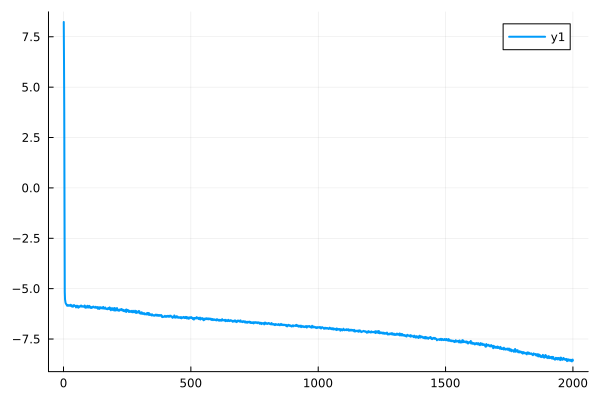

In [142]:
plot(loss_it, width=2.0)

In [147]:
test1 = rand(Float32, 16)
U = (M2*M1*test1)' *  ss
L = (U*U' - Matrix{Float32}(I, p.M_size, p.M_size))
println(L[1,1])
println(L[2,2])
println(L[3,3])
println(L[4,4])

0.044569016f0 + 0.0f0im
0.07930291f0 + 0.0f0im
0.07663381f0 + 0.0f0im
0.027372241f0 + 0.0f0im


In [26]:
II = [Matrix{Float32}(I, p.M_size, p.M_size) for i in 1:p.b]
II0 = Matrix{Float32}(I, p.M_size, p.M_size)
it_M = 20000
loss_it = zeros(Float32, it_M)
opt = ADAM()
log_min = Float32(1e-6)
ss = set_V(p)

32-element Vector{Matrix{ComplexF32}}:
 [1.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 1.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im 1.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im 0.0f0 + 1.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0

In [57]:
function loss_single(p::Parm, v, MM::Matrix{Float32})
    #U = MM * v
    
    U = (MM*v)'
    #L = (U .- II)
    return (tr(real.(U'*U)))/p.b
    #return log((real(tr(L'*L))+log_min)/p.b)
end

loss_single (generic function with 2 methods)

In [59]:
test = rand(Float32, p.input, p.b)
M0 = randn(Float32, p.output, p.input)
#U_test = (M0*test
#real(tr(U_test'*U_test)) / p.b
grads_test = Flux.gradient(Flux.params(M0)) do
    loss_single(p, test, M0)
end

MethodError: MethodError: Cannot `convert` an object of type Nothing to an object of type Matrix{ComplexF32}
Closest candidates are:
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at ~/.julia/juliaup/julia-1.8.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.8/LinearAlgebra/src/factorization.jl:58
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}) where {S, T, N} at ~/.julia/packages/StaticArrays/VLqRb/src/SizedArray.jl:88
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}) where {T, S, N} at ~/.julia/packages/StaticArrays/VLqRb/src/SizedArray.jl:82
  ...

In [39]:
function set_mUnit(p::Parm)
    Z = zeros(Float32, p.output, p.b)
    for bb in 1:p.b
        for m in 1:p.M_size
            Z[2*m^2-1,bb] = 1.0
        end
    end
    return Z
end

set_mUnit (generic function with 1 method)

In [40]:
Z0 = set_mUnit(p)

32×10 Matrix{Float32}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0 

In [23]:
M0 = randn(Float32, p.output, p.input)
for it in 1:it_M
    v16 = rand(Float32, p.M_size^2, p.b)
    l1::Float32 = 0.0
    grads = Flux.gradient(Flux.params(M0)) do
        #loss_calc_hyb(model, en, ag, HF_it)
        l1 = loss_single(p, v16, M0)
    end
    #Flux.Optimise.update!(opt, Flux.params(M1, M2), grads)
    loss_it[it] = l1
end

MethodError: MethodError: Cannot `convert` an object of type Nothing to an object of type Matrix{ComplexF32}
Closest candidates are:
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at ~/.julia/juliaup/julia-1.8.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.8/LinearAlgebra/src/factorization.jl:58
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}) where {S, T, N} at ~/.julia/packages/StaticArrays/VLqRb/src/SizedArray.jl:88
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}) where {T, S, N} at ~/.julia/packages/StaticArrays/VLqRb/src/SizedArray.jl:82
  ...